# Part 1 Data Exploration:  2015 Street Tree Census - Tree Data
### Street tree data from the TreesCount! 2015 Street Tree Census by NYC Parks & Recreation.

Tree data collected includes tree species, diameter and perception of health. Accompanying blockface data is available indicating status of data collection and data release citywide.

We will dive deep into the data and find out potential problems, issues to fix and extract insights from it.

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)  #to show all the columns hidden in between

In [5]:
tree_census = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')
tree_census

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


### Create a subset; Filtering out the unnecessary columns:

In [7]:
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [9]:
tree_census_subset = tree_census[['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc',
        'status', 'health', 'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [14]:
#amount of null values
tree_census_subset.isnull().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

In [17]:
#there're a lot of null values.
tree_census_subset[tree_census_subset['health'].isnull()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [19]:
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


In [23]:
tree_census_subset.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_latin     object
steward       object
sidewalk      object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
dtype: object

### Creating a Histogram to show the distribution of tree diameter (tree_dbh):

array([[<AxesSubplot: title={'center': 'tree_id'}>,
        <AxesSubplot: title={'center': 'tree_dbh'}>],
       [<AxesSubplot: title={'center': 'stump_diam'}>, <AxesSubplot: >]],
      dtype=object)

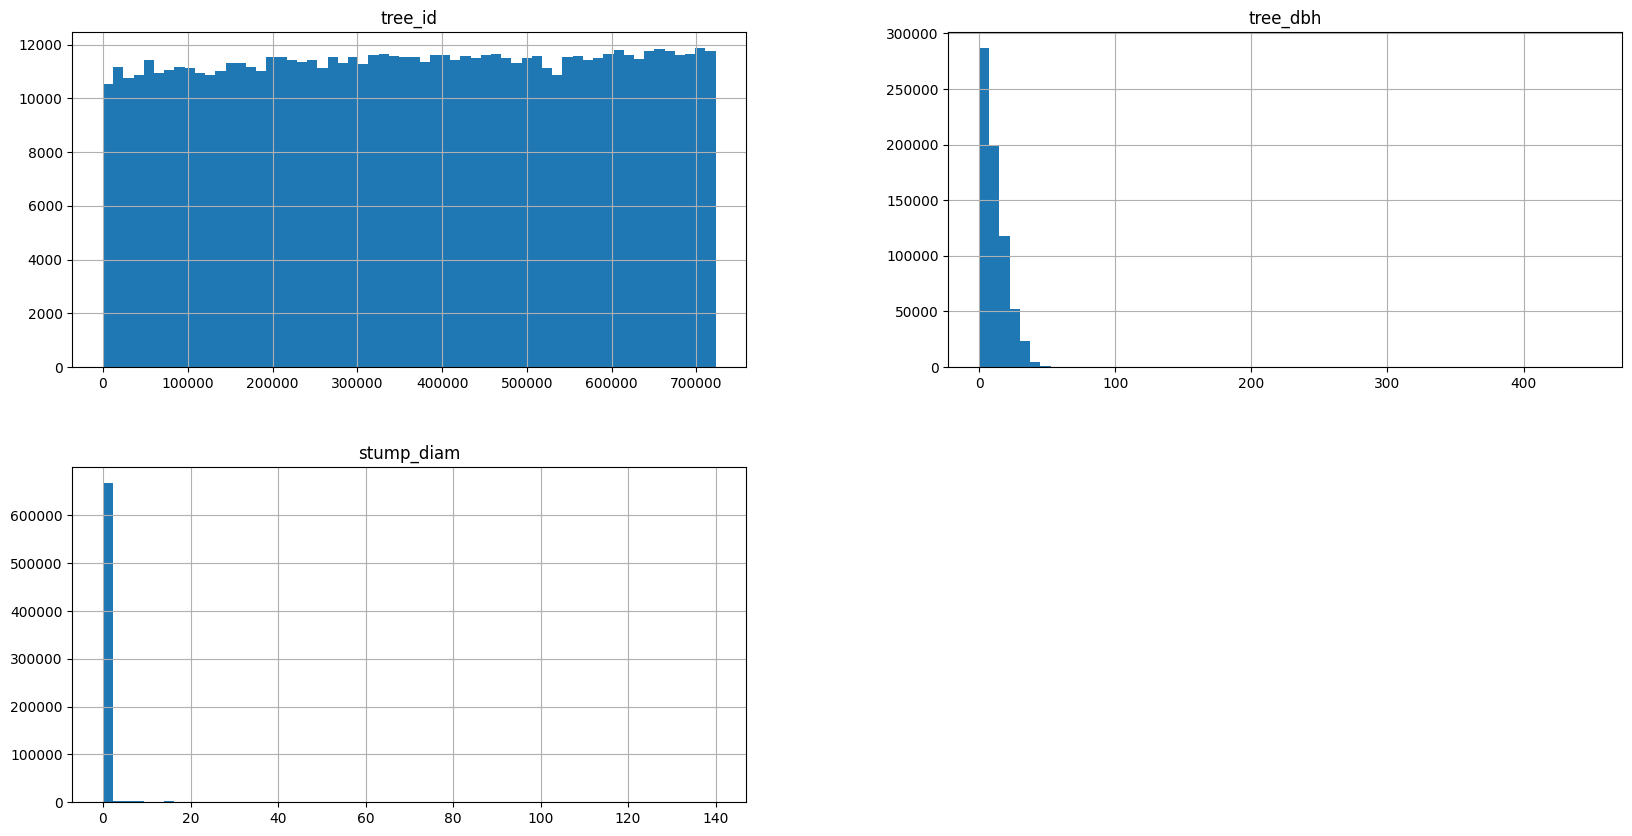

In [28]:
tree_census_subset.hist(bins=60, figsize=(20,10))

In [31]:
big_trees = tree_census_subset[tree_census_subset['tree_dbh']>50]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


### Outliers check:

<AxesSubplot: xlabel='tree_id', ylabel='tree_dbh'>

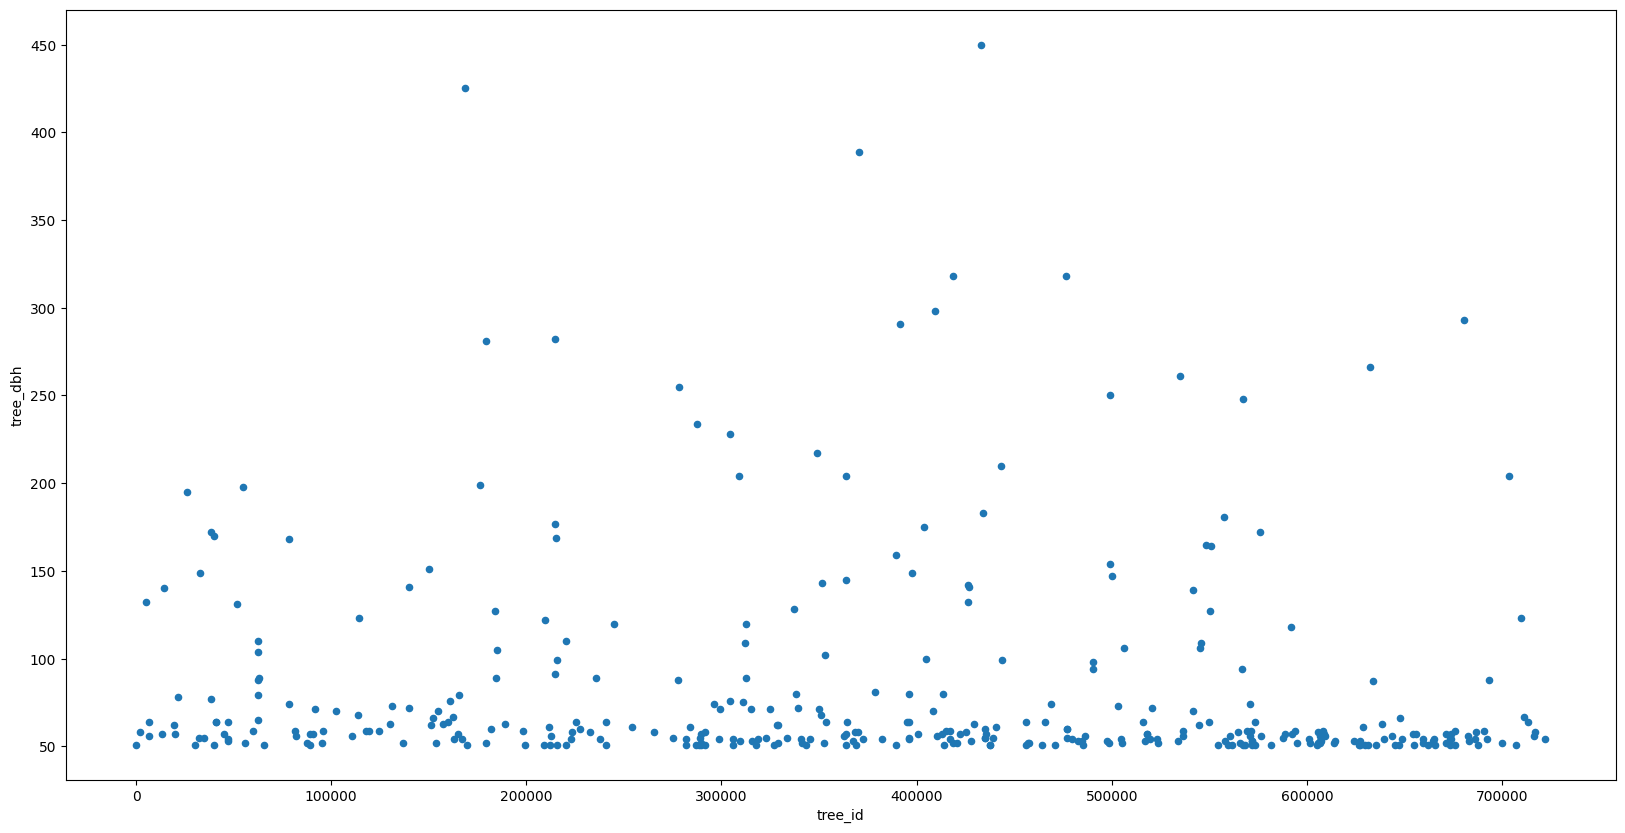

In [33]:
big_trees[['tree_id', 'tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh', figsize=(20,10))

Observation: 450 could be an error in translation, they probably forgot to change it to diameter as 450 inches is too dispropotionately out of the norm compared to the other values.

## Categorical values check

### Observing the range and population of tree types:

<AxesSubplot: >

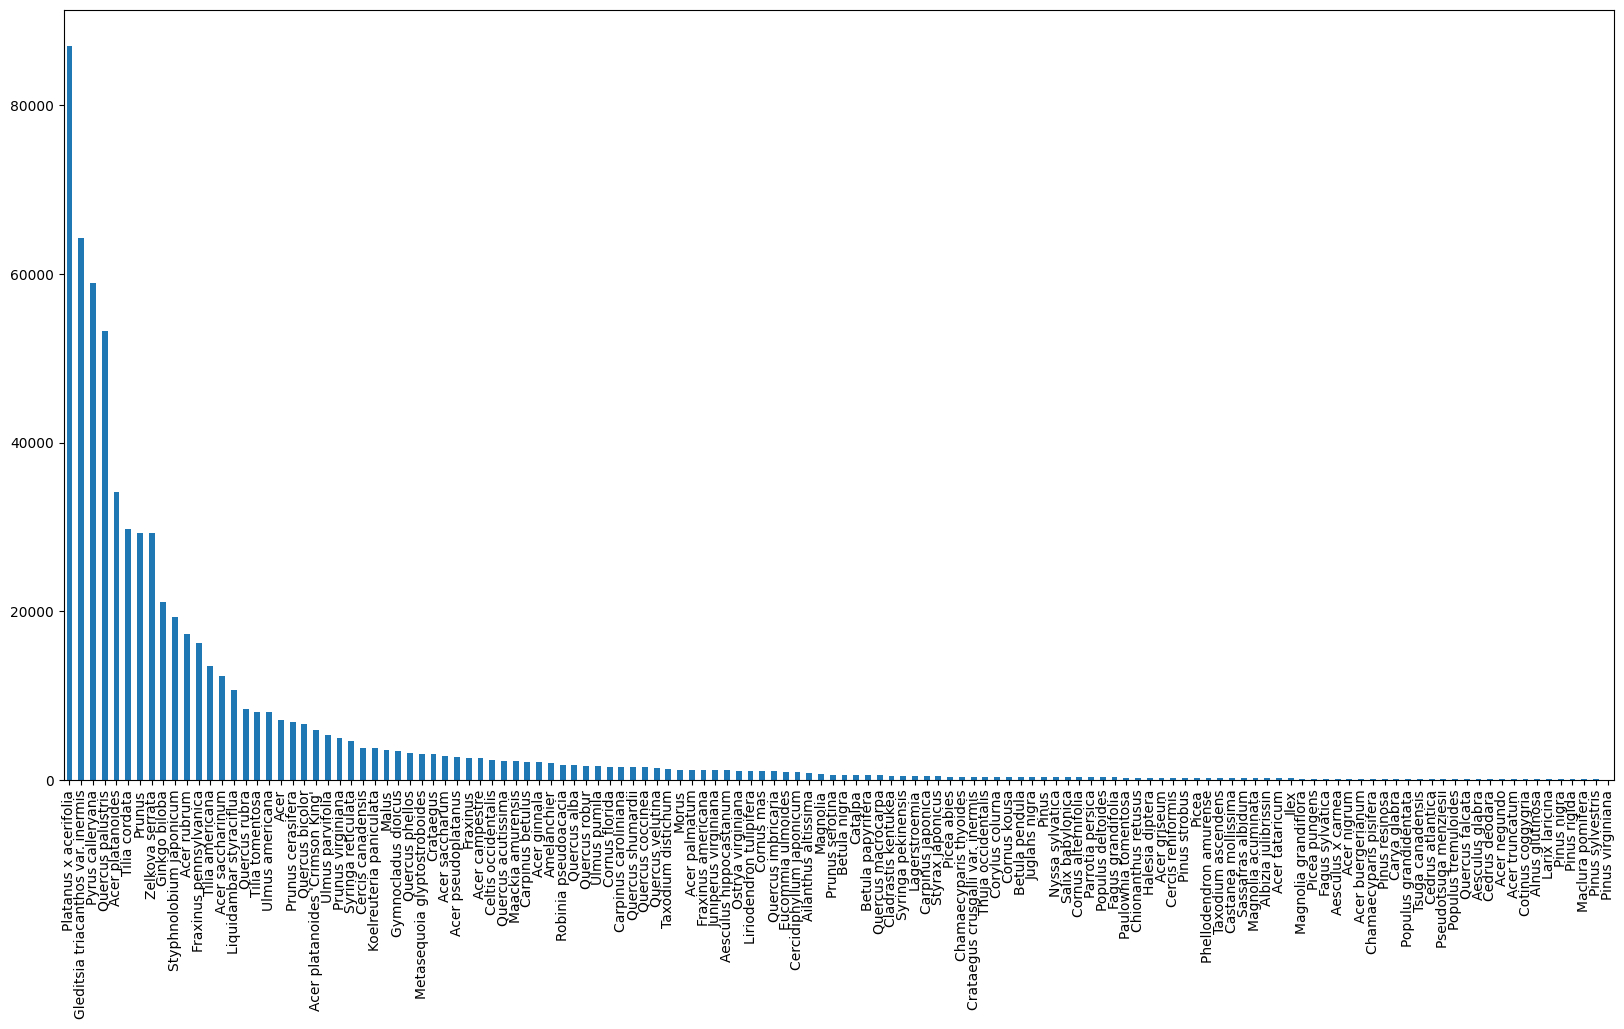

In [37]:
tree_census_subset['spc_latin'].value_counts().plot(kind='bar', figsize=(20,10))

### Seeing the options available for 'steward':

In [39]:
tree_census_subset['steward'].value_counts()
#looks clean

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

### Seeing the options available for 'sidewalk':

In [43]:
tree_census_subset['curb_loc'].value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

### Is there a mismatch between 'stump' or 'dead' trees with status of health? :

In [46]:
stumps = tree_census_subset[tree_census_subset['status'] == 'Stump']
stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [48]:
deads = tree_census_subset[tree_census_subset['status'] == 'Dead']
deads

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


#### 17654 rows + 13961 rows = 13961 rows. Thus, it matches very closely with total value of 'health' rows and is quite accurate recording. Maybe they didn't think is a need to or bother to record a non-Alive tree.

## Explore distribution of binary columns

### Now, to see the distribution of tree species:

In [51]:
tree_problems = tree_census_subset[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


### How many yes and no of the Series:

In [56]:
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


# Part 2 Data Cleaning:  2015 Street Tree Census - Tree Data

### Adding new values to the 'health' column, to be more detailed:

In [59]:
tree_census_subset['health'].value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [61]:
mask = ((tree_census_subset['status']=='Stump') | (tree_census_subset['status']=='Dead'))

In [63]:
#Choosing specific column(s) to update
#1st is row, 2nd is column
tree_census_subset.loc[mask] = tree_census_subset.loc[mask, 'health'].fillna('Not Applicable')

In [66]:
tree_census_subset[tree_census_subset['status'] == 'Stump']

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


Now, checking remaining columns that still have Null values inside.

In [68]:
tree_census_subset[tree_census_subset['health'].isnull()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


In [81]:
tree_census_subset['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [73]:
tree_census_subset[tree_census_subset['problems'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [75]:
tree_census_subset['problems'].value_counts()

None                                                                          426280
Stones                                                                         95673
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
RootOther                                                                      11418
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
MetalGrates,RootOther,WiresRope,TrunkLights,BranchLights,BranchOther               1
MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther                         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: problems, Length: 232, dtype: int64

In [82]:
tree_census_subset['problems'].fillna('None', inplace=True)
tree_census_subset['health'].fillna('Good', inplace=True)
tree_census_subset['spc_latin'].fillna('No Observation', inplace=True)
tree_census_subset['sidewalk'].fillna('NoDamage', inplace=True)
tree_census_subset['steward'].fillna('None', inplace=True)

/var/folders/fq/8t9cyhs53ql809q23q2w62wh0000gn/T/ipykernel_11643/3846822687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['problems'].fillna('None', inplace=True)
/var/folders/fq/8t9cyhs53ql809q23q2w62wh0000gn/T/ipykernel_11643/3846822687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_census_subset['health'].fillna('Good', inplace=True)
/var/folders/fq/8t9cyhs53ql809q23q2w62wh0000gn/T/ipykernel_11643/3846822687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [83]:
tree_census_subset.isnull().sum()
#Ta-da. No null already.

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

### Analysing the trees now. Checking for outliers.

In [85]:
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


In [87]:
tree_census_subset = tree_census_subset[(tree_census_subset['tree_dbh']<=60)|(tree_census_subset['stump_diam']<=60)]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [89]:
tree_census_subset_alive = tree_census_subset[tree_census_subset['status']=='Alive']
tree_census_subset_dead_or_stump = tree_census_subset[(tree_census_subset['status']=='Dead')|(tree_census_subset['status']=='Stump')]

In [92]:
#Find the percentile of tree species, and search for any outliers.

tree_census_subset_alive.groupby('spc_latin')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2550.0,7.126275,4.437674,0.0,4.0,6.0,9.0,64.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,88.0,5.193182,3.959153,0.0,2.0,3.5,7.0,21.0
Ulmus americana,7975.0,11.953229,9.426278,0.0,4.0,9.0,17.0,65.0
Ulmus parvifolia,5345.0,7.417587,5.867390,0.0,3.0,5.0,10.0,118.0


Outlier spotted: min. value is 0...
For instance, Acer campestre tree: anything below 4.0 on 25% percentile could be a mistake.

In [94]:
#Create a new table for the percentile

status_alive = tree_census_subset_alive.groupby('spc_latin')['tree_dbh'].describe().reset_index()[['spc_latin', '25%', '75%']]
status_alive

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


In [98]:
#merge and compare

tree_census_subset_alive.merge(status_alive, on='spc_latin', how='left')
tree_census_subset_alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
